In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans

# Загрузка данных из CSV файлов
data = pd.read_csv('/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data_api/ar_api.jtl')
data_new_release = pd.read_csv('/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data_api/ar_api_power.jtl')

# Фильтрация по необходимым столбцам
data_filtered = data[['elapsed', 'label']]
data_new_release_filtered = data_new_release[['elapsed', 'label']]

# Преобразование 'label' в числовой формат для обоих наборов данных
data_filtered['label_encoded'] = data_filtered['label'].astype('category').cat.codes
data_new_release_filtered['label_encoded'] = data_new_release_filtered['label'].astype('category').cat.codes


/var/folders/38/_rx6rl813f70rlbmhn_dp4z00000gn/T/ipykernel_72575/2295548558.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['label_encoded'] = data_filtered['label'].astype('category').cat.codes
/var/folders/38/_rx6rl813f70rlbmhn_dp4z00000gn/T/ipykernel_72575/2295548558.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_release_filtered['label_encoded'] = data_new_release_filtered['label'].astype('category').cat.codes


In [2]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_filtered[['elapsed', 'label_encoded']])
data_new_release_normalized = scaler.fit_transform(data_new_release_filtered[['elapsed', 'label_encoded']])


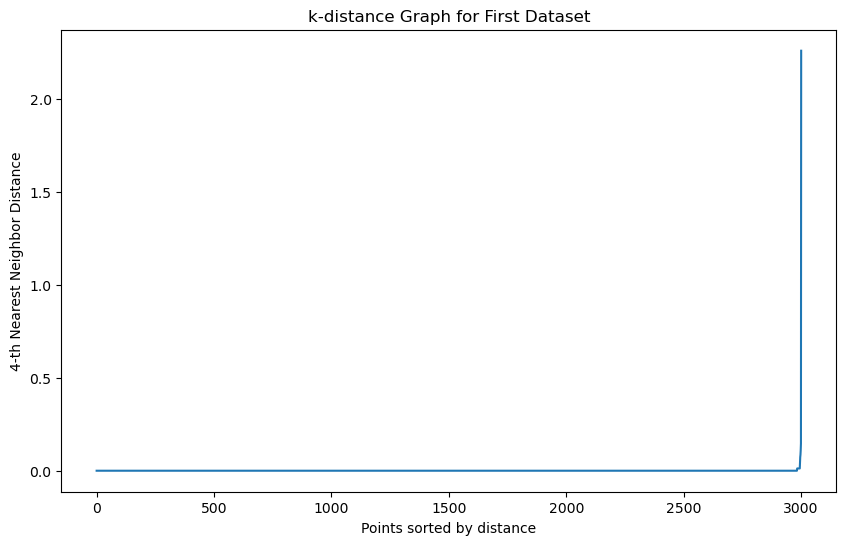

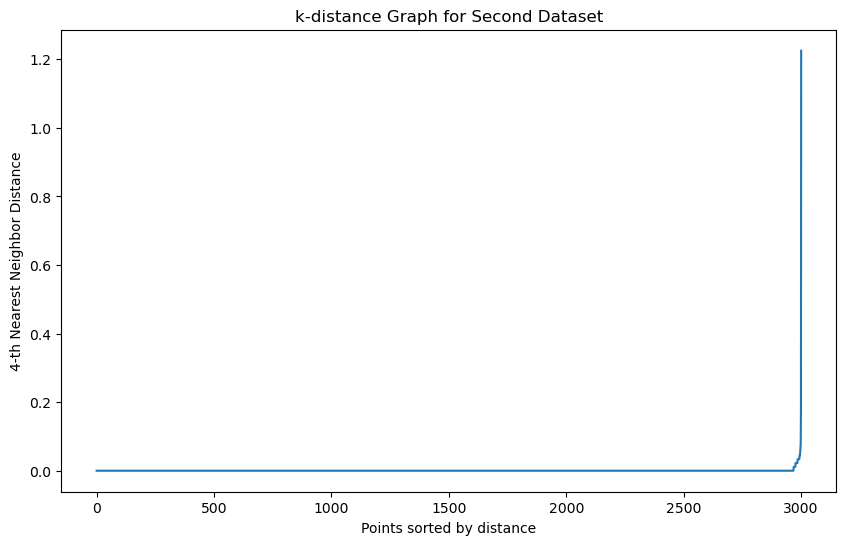

In [3]:
from sklearn.neighbors import NearestNeighbors

# Определение расстояний до k-го ближайшего соседа для первого набора данных
min_samples = 4
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(data_normalized)
distances, indices = neighbors_fit.kneighbors(data_normalized)

# Построение графика метода "k-расстояний" для первого набора данных
distances = np.sort(distances[:, min_samples - 1], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-distance Graph for First Dataset')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.show()

# Определение eps на основании графика (например, 0.3)
eps = 0.3

# Повторение для второго набора данных
neighbors_new = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit_new = neighbors_new.fit(data_new_release_normalized)
distances_new, indices_new = neighbors_fit_new.kneighbors(data_new_release_normalized)

distances_new = np.sort(distances_new[:, min_samples - 1], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances_new)
plt.title('k-distance Graph for Second Dataset')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.show()

# Определение eps на основании графика для второго набора данных (например, 0.4)
eps_new = 0.4


## Применение DBSCAN и KMEANS

In [4]:
# Применение DBSCAN для первого набора данных
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(data_normalized)

# Применение K-Means для первого набора данных
optimal_k = 3  # Определите это число на основе ваших данных или экспериментов
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_normalized)

# Применение DBSCAN для второго набора данных
dbscan_new = DBSCAN(eps=eps_new, min_samples=min_samples)
dbscan_labels_new = dbscan_new.fit_predict(data_new_release_normalized)

# Применение K-Means для второго набора данных
kmeans_new = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels_new = kmeans_new.fit_predict(data_new_release_normalized)


## Рисуем

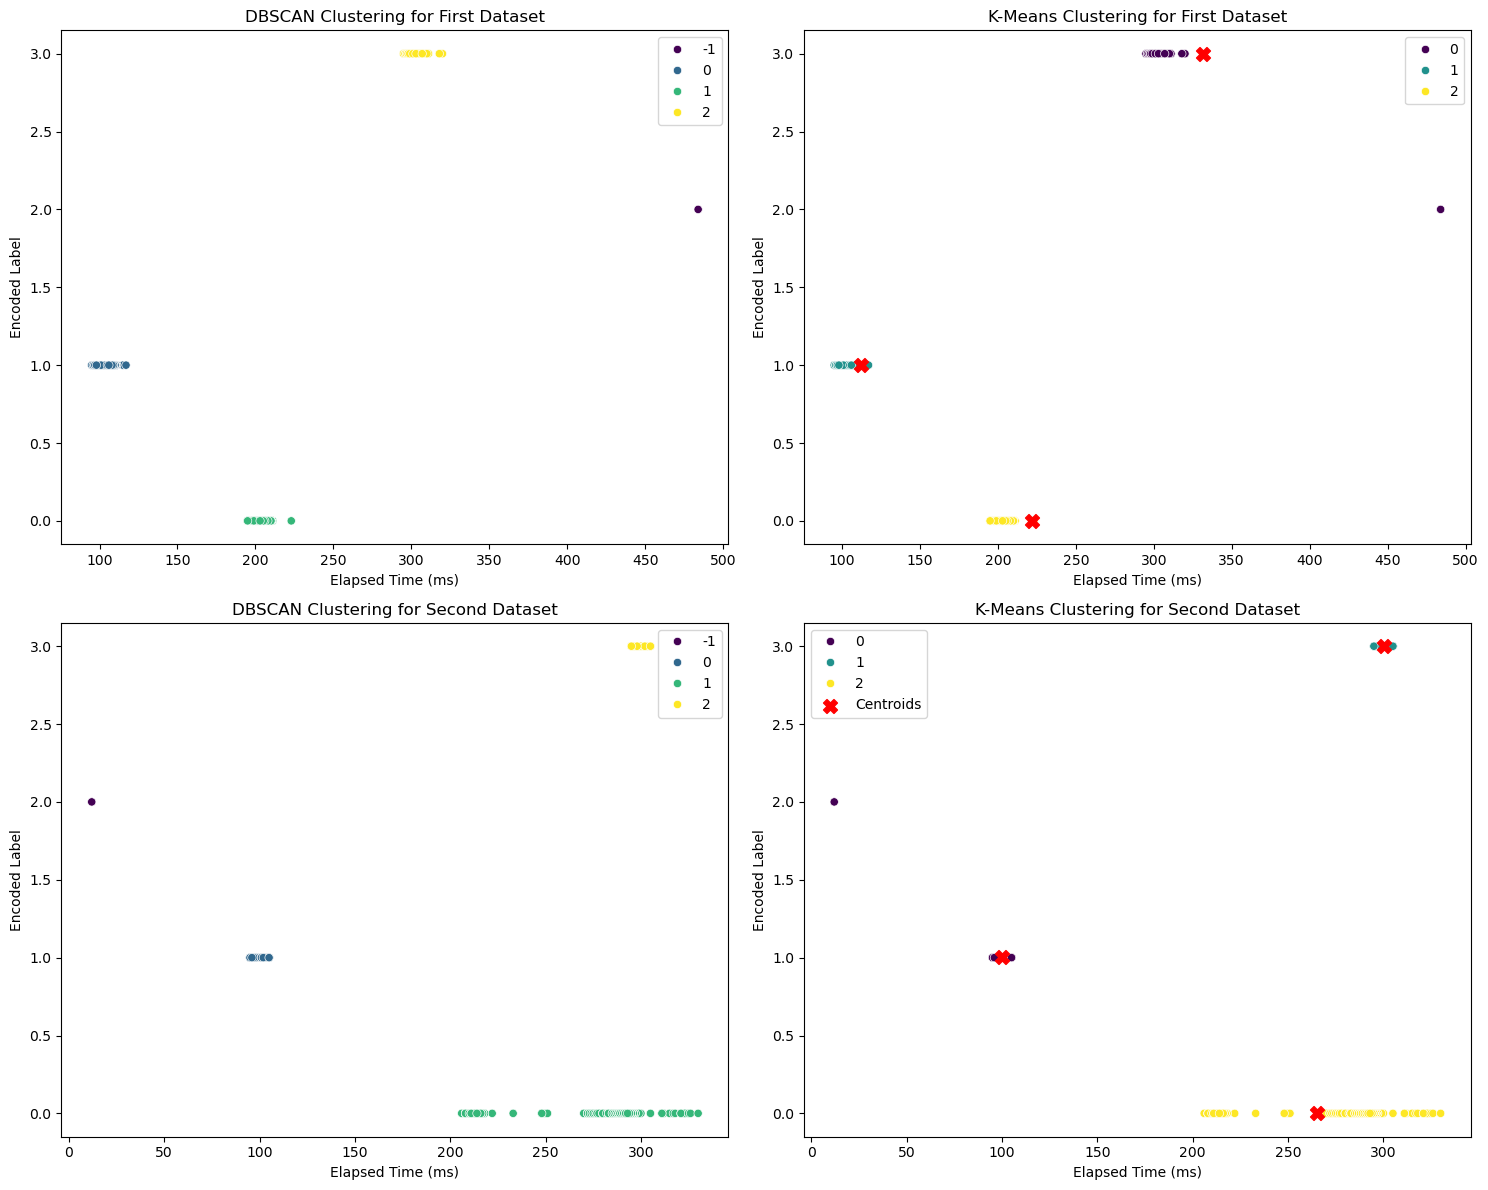

In [6]:
# Визуализация кластеров и центроидов для обоих наборов данных
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# DBSCAN Clustering for First Dataset
sns.scatterplot(x=data_filtered['elapsed'], y=data_filtered['label_encoded'], hue=dbscan_labels, palette='viridis', ax=axes[0, 0], legend='full')
axes[0, 0].set_title('DBSCAN Clustering for First Dataset')
axes[0, 0].set_xlabel('Elapsed Time (ms)')
axes[0, 0].set_ylabel('Encoded Label')

# K-Means Clustering for First Dataset
sns.scatterplot(x=data_filtered['elapsed'], y=data_filtered['label_encoded'], hue=kmeans_labels, palette='viridis', ax=axes[0, 1], legend='full')
axes[0, 1].set_title('K-Means Clustering for First Dataset')
axes[0, 1].set_xlabel('Elapsed Time (ms)')
axes[0, 1].set_ylabel('Encoded Label')

# Overlay K-Means centroids for First Dataset
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
axes[0, 1].scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroids', marker='X')

# DBSCAN Clustering for Second Dataset
sns.scatterplot(x=data_new_release_filtered['elapsed'], y=data_new_release_filtered['label_encoded'], hue=dbscan_labels_new, palette='viridis', ax=axes[1, 0], legend='full')
axes[1, 0].set_title('DBSCAN Clustering for Second Dataset')
axes[1, 0].set_xlabel('Elapsed Time (ms)')
axes[1, 0].set_ylabel('Encoded Label')

# K-Means Clustering for Second Dataset
sns.scatterplot(x=data_new_release_filtered['elapsed'], y=data_new_release_filtered['label_encoded'], hue=kmeans_labels_new, palette='viridis', ax=axes[1, 1], legend='full')
axes[1, 1].set_title('K-Means Clustering for Second Dataset')
axes[1, 1].set_xlabel('Elapsed Time (ms)')
axes[1, 1].set_ylabel('Encoded Label')

# Overlay K-Means centroids for Second Dataset
centroids_new = scaler.inverse_transform(kmeans_new.cluster_centers_)
axes[1, 1].scatter(centroids_new[:, 0], centroids_new[:, 1], s=100, c='red', label='Centroids', marker='X')

plt.legend()
plt.tight_layout()
plt.show()
